In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [79]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

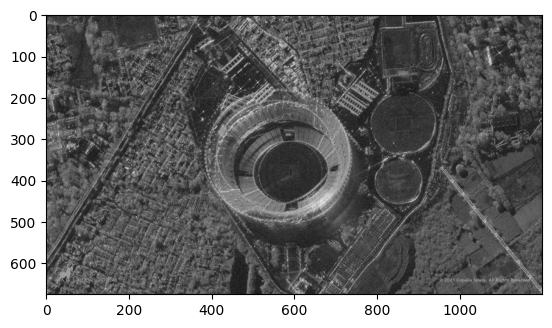

In [80]:
plt.imshow(image_gray, cmap="gray")

In [81]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  84,  79, ...,   0, 255, 130],
       [ 62,  27,  22, ..., 105,   6, 111],
       [ 28,   0,  57, ..., 127, 145,   0],
       ...,
       [  0,   0, 136, ...,  51, 116, 133],
       [ 43,  17,  32, ...,  45,   0,  81],
       [143, 159,   0, ...,  25,   0, 169]],
      shape=(675, 1200), dtype=uint8)

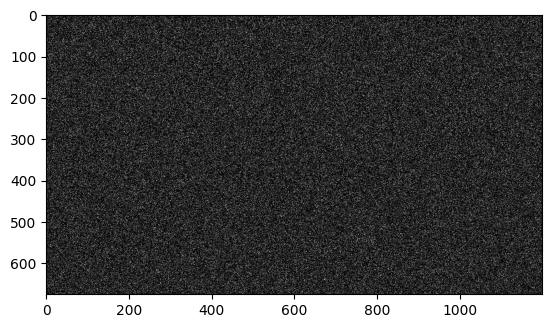

In [82]:
plt.imshow(noise_gauss, cmap="gray")

In [83]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [84]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [85]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

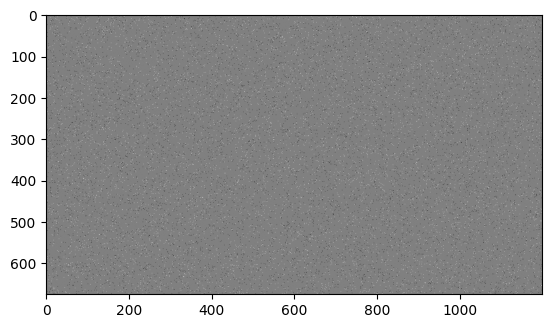

In [86]:
plt.imshow(bg_image, cmap="gray")

In [87]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

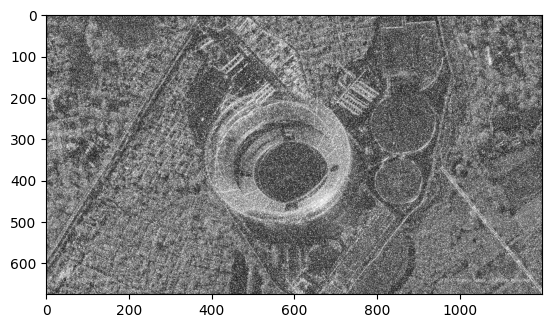

In [88]:
plt.imshow(image_noise_gauss, cmap="gray")

In [89]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4226.025272839506 0.18728917567733971


In [90]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [91]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [92]:
print(mse_gauss_median, ssim_gauss_median)

1035.5800814814816 0.4294396202069238


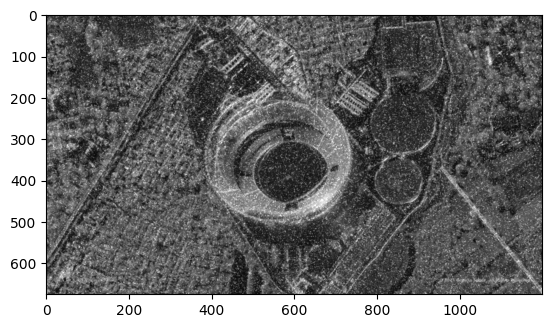

In [93]:
plt.imshow(image_gauss_median, cmap="gray")

In [94]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

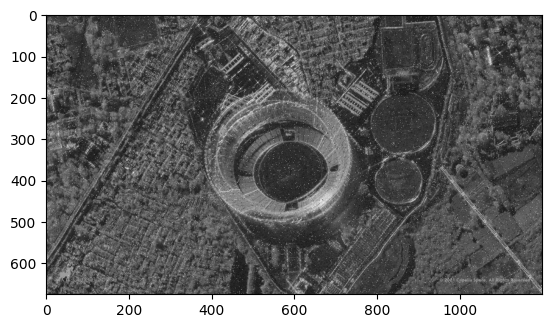

In [95]:
plt.imshow(image_sp, cmap="gray")

In [96]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

394.0279777777778 0.7171875137267338


In [97]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [98]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.79861234567902 0.8161489672770719


# Другие типы фильтров

In [99]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [100]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [101]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [102]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\shken\AppData\Local\Temp\ipykernel_17364\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


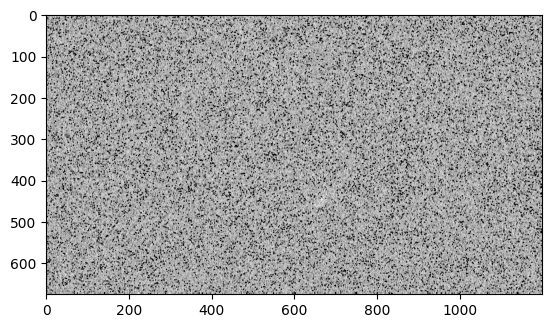

In [103]:
plt.imshow(res, cmap="gray")

In [104]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.221713580247 0.027448890172938705



# 2D свертка

In [105]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [106]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [107]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [108]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

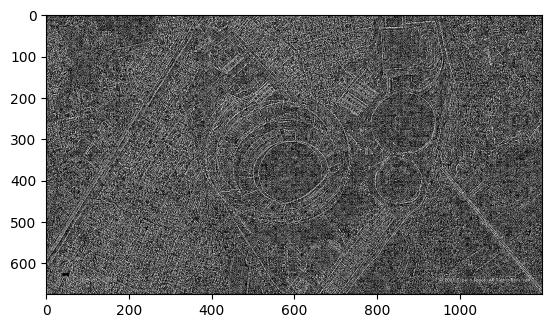

In [109]:
plt.imshow(image_lapl, cmap="gray")

In [ ]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

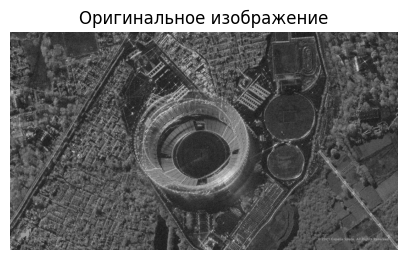

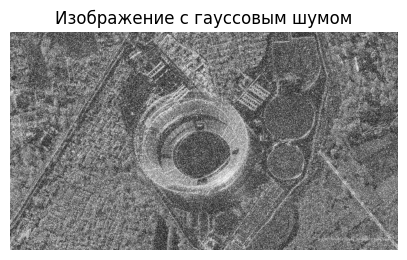

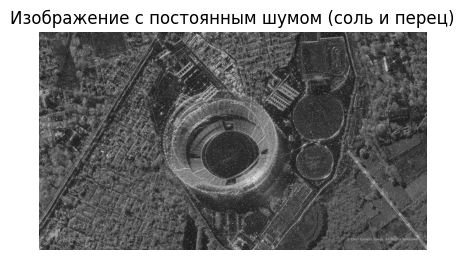

In [111]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5,5))
plt.title("Оригинальное изображение")
plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()

mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)
plt.figure(figsize=(5,5))
plt.title("Изображение с гауссовым шумом")
plt.imshow(image_noise_gauss, cmap="gray")
plt.axis("off")
plt.show()


noise = np.random.randint(0, 101, size=image_gray.shape, dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)
image_const_noise = image_gray.copy()
image_const_noise[zeros_pixel] = 0
image_const_noise[ones_pixel] = 255
plt.figure(figsize=(5,5))
plt.title("Изображение с постоянным шумом (соль и перец)")
plt.imshow(image_const_noise, cmap="gray")
plt.axis("off")
plt.show()


In [126]:
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
median_ks = [3, 5, 7]
median_results = {}

for k in median_ks:
    filtered = cv2.medianBlur(image_noise_gauss, k)
    median_results[k] = filtered

gauss_sizes = [3, 5, 9]
gauss_results = {}

for s in gauss_sizes:
    filtered = cv2.GaussianBlur(image_noise_gauss, (s, s), 0)
    gauss_results[s] = filtered

bilat_params = [(5, 50, 50), (9, 75, 75), (15, 100, 100)]
bilat_results = {}

for d, sc, ss in bilat_params:
    filtered = cv2.bilateralFilter(image_noise_gauss, d, sc, ss)
    bilat_results[(d, sc, ss)] = filtered

h_values = [5, 10, 20, 30]
nlm_results = {}

for h in h_values:
    filtered = cv2.fastNlMeansDenoising(image_noise_gauss, h=h)
    nlm_results[h] = filtered

In [127]:
# Выяснить, какой фильтр показал лучший результат фильтрации шума.
def psnr(original, filtered):
    mse = np.mean((original.astype(np.float32) - filtered.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    psnr_value = 10 * np.log10((255 ** 2) / mse)
    return psnr_value

print("=== PSNR для разных фильтров ===\n")

print("Медианный фильтр:")
for k, img in median_results.items():
    print(f"  k={k} → PSNR = {psnr(image_gray, img):.2f} dB")

print("\nГауссов фильтр:")
for s, img in gauss_results.items():
    print(f"  size={s}x{s} → PSNR = {psnr(image_gray, img):.2f} dB")

print("\nБилатериальный фильтр:")
for (d, sc, ss), img in bilat_results.items():
    print(f"  d={d}, sigmaColor={sc}, sigmaSpace={ss} → PSNR = {psnr(image_gray, img):.2f} dB")

print("\nНелокальные средние:")
for h, img in nlm_results.items():
    print(f"  h={h} → PSNR = {psnr(image_gray, img):.2f} dB")

=== PSNR для разных фильтров ===

Медианный фильтр:
  k=3 → PSNR = 18.00 dB
  k=5 → PSNR = 19.66 dB
  k=7 → PSNR = 19.81 dB

Гауссов фильтр:
  size=3x3 → PSNR = 15.35 dB
  size=5x5 → PSNR = 15.68 dB
  size=9x9 → PSNR = 15.79 dB

Билатериальный фильтр:
  d=5, sigmaColor=50, sigmaSpace=50 → PSNR = 13.56 dB
  d=9, sigmaColor=75, sigmaSpace=75 → PSNR = 15.49 dB
  d=15, sigmaColor=100, sigmaSpace=100 → PSNR = 16.14 dB

Нелокальные средние:
  h=5 → PSNR = 11.87 dB
  h=10 → PSNR = 11.87 dB
  h=20 → PSNR = 11.88 dB
  h=30 → PSNR = 13.46 dB
